<center>
<h1>Earthquake & Popular Venues Data Analysis of Turkey</h1>
<hr>
</center>

## Introduction
### Description & Discussion of the Background

Turkey is an earthquake populous country with 82 million inhabitants. It consists of 81
provinces. It is surrounded by the North Anatolia, Western Anatolia and Southeastern Anatolia
earthquake zones. The diversity of landforms in Turkey, is a result of earth movement that
shaped the terrain in the region for thousands of years. It has extinct volcanoes and earthquakes still occur frequently. In the north and east of the
country, there are large fault lines that cause earthquakes today. The great Marmara earthquake
that occurred on the North Anatolian Fault Line in 1999 caused the death of thousands of
people. Although Turkey is a country of earthquakes, though it is also a tourist country. It is visited by
millions of tourists from all over the world every year. There are even some foreign nationals
to buy real estate in Turkey and make the trade.

### Problem
A data analysis based on earthquake statistics and popular locations of each city will be found
interesting by investors and consumers. Investors can carry out projects for places with less
earthquake risk and invest in jobs where the type of business in those places is less intense. For
regular person living in cities, they may want to buy and live in places that are less dangerous
and at the same time close to social venues. Therefore, with a clustering study to be carried out by taking earthquake statistics based on a
reasonable past (for example, 100 years) of each city, the regions with high or no earthquake
risk can be determined. In addition, by comparing popular venues in these regions, the
distinctiveness between regions can be revealed.


## Data
### Data Sources
The data sources used in this study to solve the problem are as follows:
<ul>
<li>From the AFAD Earthquake Catalog page, the statistics of the earthquakes that occurred between 1920-2020 and whose magnitudes were between 4-10 according to the Richter scale were taken in csv format with various filtering methods.</li>
<li> With OpenStreetMap, the GeoJSON data needed for earthquake distribution and maps showing clustered groups was provided.</li>
<li>With the Foursquare API, the type information of the most popular venues of the cities,
the latitude and longitude information of those places were obtained.</li>
<li>From Wikipedia was taken Turkey's cities list. The latitude and longitude information of the cities were obtained by querying them one by one with the help of Python GeoPy Library.</li>
</ul>

## Methodology

Let's create first dataframe with earthquake statistics from AFAD. As a database, I used GitHub repository in my study.

While receiving AFAD earthquake data, _“Rectangular Search Type”_ was implemented. It was
realized that some of the data received came from locations outside the borders of Turkey. Since
the names of the cities where the earthquakes occurred are not included in the earthquake
statistics, the information of the cities where the earthquakes occurred was obtained by using
the GeoPy Library and the Reverse Geocoding method for each data. The data of earthquakes
have occurred outside of Turkey was removed from the master data set. Thus, a total of __4364__
rows of data remained in the master data.

In [1]:
# Importing required libs.
import numpy as np
import pandas as pd

# Options for view.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Earthquake Data.
eq_data = pd.read_csv("https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/data/earthquake_data.csv")
eq_data.head(10)

City  Eq_Latitude  Eq_Longitude  Magnitude  Depth
0       Kars      40.3230       42.1726        4.2   7.00
1     Elazığ      38.3898       39.0158        4.9  11.88
2    Tunceli      39.4648       40.0195        4.2  13.21
3  Balıkesir      39.4411       27.9005        4.0  14.36
4  Balıkesir      39.4435       27.9103        4.3  11.28
5  Balıkesir      39.4430       27.9336        4.6   7.00
6       Kars      40.3255       42.2033        4.0   7.04
7       Kars      40.3106       42.1895        4.0   6.97
8    Denizli      37.8430       29.6411        4.0   7.00
9      Adana      37.6265       35.6468        4.0  11.25

According to the data set obtained, it can be seen by looking at the __Magnitude Histogram
Chart__ that the majority of the earthquakes that occurred were between 4 and 4.78 in magnitude.
The histogram graph is informative about the distribution of earthquakes and is useful for
getting to know the structure of the data set.

In [2]:
# Matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

# Magnitude Histogram Chart
count, bin_edges = np.histogram(eq_data['Magnitude'])
eq_data['Magnitude'].plot(kind='hist', xticks=bin_edges, color="skyblue")
plt.title('Histogram of Earthquake Magnitude')
plt.ylabel('Number of Earthquake') 
plt.xlabel('Magnitude') 
plt.show()

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/3.png" target="_blank">here</a>.

In addition, the standard deviation, minimum and maximum values of the data set in the study
were examined and an opinion was obtained. The table for this review is shown below.

In [3]:
# Exploring Earthquake Data.
eq_data.describe()

Eq_Latitude  Eq_Longitude    Magnitude        Depth
count  4364.000000   4364.000000  4364.000000  4364.000000
mean     38.835247     33.601072     4.446677    20.293838
std       1.277391      5.900461     0.470403    19.371195
min      36.087500     25.980000     4.000000     0.000000
25%      37.841325     28.742625     4.100000    10.000000
50%      38.880250     30.800000     4.300000    12.000000
75%      39.750000     39.610500     4.600000    27.000000
max      41.953100     44.800000     7.900000   212.000000

The Magnitude standard deviation value of __~0.47__ shows that Magnitude
values are in a more uniform distribution and close to each other than other variables.
Magnitude Histogram Chart in Figure 5 also supports this idea. The __Depth Histogram Chart__
below, which shows the distribution of Depth values, can also be examined.

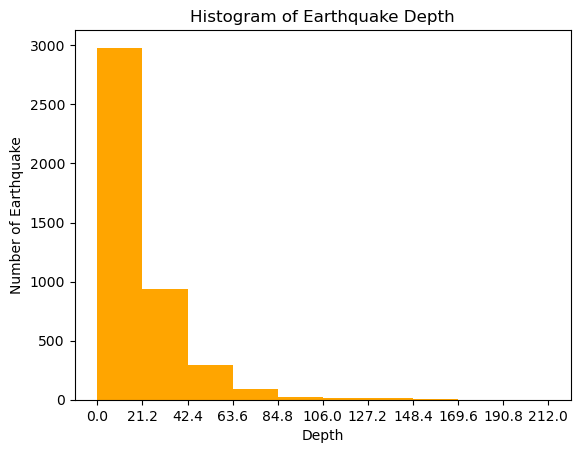

In [4]:
# Depth Histogram Chart
count, bin_edges = np.histogram(eq_data['Depth'])
eq_data['Depth'].plot(kind='hist', xticks=bin_edges, color="orange")
plt.title('Histogram of Earthquake Depth')
plt.ylabel('Number of Earthquake') 
plt.xlabel('Depth') 
plt.show()

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/5.png" target="_blank">here</a>.

In [5]:
# GeoPy lib for coordinates and addresses.
!pip install geopy
from geopy.geocoders import Nominatim

# Getting Turkey's Geographical Coordinates.
try:
    location = Nominatim(user_agent="ibm_capstone_project").geocode('Turkey, TR')
    tr_lat = location.latitude
    tr_lon = location.longitude
    print('The geograpical coordinate Central of Turkey: {}, {}'.format(tr_lat, tr_lon))
    
except Exception as e:
    print(e)

The geograpical coordinate Central of Turkey: 38.9597594, 34.9249653


In [6]:
# For showing progress bar.
def prgrss(sequence, every=None, size=None, name='Loading'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

Using the Python Folium Library, the geographical details of __4364 earthquake points__ were
visualized for initial insights. It was a useful visualization, especially in terms of seeing in which
regions earthquakes occurred and gaining an idea about the earthquake distribution.

In [7]:
# Folium library for showing earthquake map.
!pip install folium
import folium

zoom_start = 6
eq_map = folium.Map(location=[tr_lat, tr_lon], zoom_start=zoom_start) 

for c, lt, ln, m, d in prgrss(zip(eq_data['City'], 
                                  eq_data['Eq_Latitude'], 
                                  eq_data['Eq_Longitude'], 
                                  eq_data['Magnitude'], 
                                  eq_data['Depth']), 
                              every=1, size=eq_data.shape[0]):
    folium.CircleMarker([lt, ln], radius=1, color='blue',
        popup='City:{}, Magnitude:{}, Depth:{}'.format(c,m,d),
        fill=True, fill_color='blue', fill_opacity=1
    ).add_to(eq_map)
    
eq_map

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/7.png" target="_blank">here</a>.

### Latitude & Longitude for each city from Wikipedia.

At this stage, github repo was used for convenience.

In [8]:
# Latitude & Longitude for each city from Wikipedia.
eq_cities = pd.read_csv("https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/data/cities_of_turkey.csv")
eq_cities.head(7)

City   Latitude  Longitude
0           Adana  36.993617  35.325835
1        Adıyaman  37.789360  38.314110
2  Afyonkarahisar  38.685273  30.642741
3            Ağrı  39.529160  43.383564
4          Amasya  40.656945  35.772717
5          Ankara  39.716044  32.705995
6         Antalya  36.900964  30.695485

### Feature Extraction

The average, maximum and minimum features for each city were generated by feature
extraction. These attributes were added to the first data set edited. The new attributes are derived
based on the Magnitude and Depth variables. The _Eq_Latitude_ and _Eq_Longitude_ attributes
were then removed from the data set. 

Finally, the Master data set was created with the addition
of the data table with the latitude and longitude information of __81 cities__ to the data set.

In [9]:
# Feature Extraction
df_mean = eq_data.drop(['Eq_Latitude','Eq_Longitude'], axis=1).groupby('City').mean()
df_mean.rename(columns={'Magnitude':'Avg Magnitude', 'Depth':'Avg Depth'}, inplace=True)

df_max = eq_data.drop(['Eq_Latitude','Eq_Longitude'], axis=1).groupby('City').max()
df_max.rename(columns={'Magnitude':'Max Magnitude', 'Depth':'Max Depth'}, inplace=True)

df_min = eq_data.drop(['Eq_Latitude','Eq_Longitude'], axis=1).groupby('City').min()
df_min.rename(columns={'Magnitude':'Min Magnitude', 'Depth':'Min Depth'}, inplace=True)

# Concatenating and dropping some dataframes with mean values.
df = pd.concat([eq_cities.set_index("City"), df_mean, df_max, df_min], axis=1)

# The places without earthquake record (Magnitude > 4.0) for 100 years
# There are 4 cities: Kırklareli, Rize, Bartın, Kilis.
# So we must support these missing values with reasonable values.
df['Avg Magnitude'].fillna(value=2.5, inplace=True)

# If these cities have not had earthquakes over 4.0 for 100 years, 
# the Max_Magnitude cannot exceed 4.0.
df['Max Magnitude'].fillna(value=3.0, inplace=True)

# The fact that there is no earthquake record greater than 4.0 for these cities in the statistics for
# 100 years does not mean that there is no earthquake.  
df['Min Magnitude'].fillna(value=1.0, inplace=True)

# However, some Depth values were found to be 0.0 in the statistics obtained from AFAD.
# Considering that this situation may be natural, the values of Max Depth and Min Depth to be
# derived below are accepted as 0.0 for these provinces. 
df['Min Depth'].fillna(value=0.0, inplace=True)
df['Max Depth'].fillna(value=0.0, inplace=True)
df['Avg Depth'].fillna(value=0.0, inplace=True)

# Reset index
df.reset_index(inplace=True)
df = df.rename(columns={'index':'City'})

# Master Data
df.head(10)

City   Latitude  Longitude  Avg Magnitude  Avg Depth  \
0           Adana  36.993617  35.325835       4.389189  23.480270   
1        Adıyaman  37.789360  38.314110       4.466667  16.218462   
2  Afyonkarahisar  38.685273  30.642741       4.490909  17.259091   
3            Ağrı  39.529160  43.383564       4.584783  21.560435   
4          Amasya  40.656945  35.772717       4.269444  10.853056   
5          Ankara  39.716044  32.705995       4.353704  10.589815   
6         Antalya  36.900964  30.695485       4.392553  52.161809   
7          Artvin  41.160506  41.839863       4.300000  15.910000   
8           Aydın  37.841301  27.832837       4.478431  18.662353   
9       Balıkesir  39.540080  28.022879       4.461333  15.355267   

   Max Magnitude  Max Depth  Min Magnitude  Min Depth  
0            6.2       86.0            4.0        2.0  
1            6.0       64.3            4.0        1.7  
2            6.0       44.9            4.0        2.0  
3            6.0       60.0            4.0        3.2  
4            5.6       33.0            4.0        3.1  
5            5.7       38.0            4.0        1.0  
6            5.4      159.2            4.0        1.6  
7            4.7       61.0            4.0        5.0  
8            6.8      101.0            4.0        2.8  
9            6.2       80.0            4.0        1.1

### Foursquare API

In [10]:
# Foursquare API Credentials
CLIENT_ID = '' 
CLIENT_SECRET = ''
VERSION = '20180604'
LIMIT = 100         # Maximum results.
RADIUS = 20000       # Diameter in meters.

In [11]:
# Library to handle requests
import requests 

def getCityVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, RADIUS, LIMIT)
            
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Return only relevant information for each nearby venue
        venues_list.append([(name, v['venue']['name'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City','Venue','Venue Category']
    
    return(nearby_venues)

In [31]:
# Getting the 100 popular venue by the city.
# Since Foursquare data has been taken before, you can use it from the github repository.

# You can also use the code below by entering the required information in the Foursquare Credentials section.
# city_venues = getCityVenues(names=df['City'], latitudes=df['Latitude'], longitudes=df['Longitude'])


Adana
Adıyaman
Afyonkarahisar
Ağrı
Amasya
Ankara
Antalya
Artvin
Aydın
Balıkesir
Bilecik
Bingöl
Bitlis
Bolu
Burdur
Bursa
Çanakkale
Çankırı
Çorum
Denizli
Diyarbakır
Edirne
Elazığ
Erzincan
Erzurum
Eskişehir
Gaziantep
Giresun
Gümüşhane
Hakkari
Hatay
Isparta
Mersin
İstanbul
İzmir
Kars
Kastamonu
Kayseri
Kırklareli
Kırşehir
Kocaeli
Konya
Kütahya
Malatya
Manisa
Kahramanmaraş
Mardin
Muğla
Muş
Nevşehir
Niğde
Ordu
Rize
Sakarya
Samsun
Siirt
Sinop
Sivas
Tekirdağ
Tokat
Trabzon
Tunceli
Şanlıurfa
Uşak
Van
Yozgat
Zonguldak
Aksaray
Bayburt
Karaman
Kırıkkale
Batman
Şırnak
Bartın 
Ardahan
Iğdır
Yalova
Karabük
Kilis 
Osmaniye
Düzce
(6581, 3)


### Foursquare Data

Foursquare API was used to discover popular venues in cities. As a limit for each city, 100
popular venues and __20 kilometers in diameter__ were measured. In some cities, it has been
observed that when the diameter measure is shorter, no popular space data is returned. For this
reason, a 20-kilometer-wide search was conducted in order to obtain at least 10 rows from each
city. A total of __6581 rows of data were obtained__.

In [12]:
# City Venues data from the Foursquare API.
city_venues = pd.read_csv("https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/data/foursquare_data.csv")

print(city_venues.shape)
city_venues.head(9)

(6581, 3)


City                     Venue      Venue Category
0  Adana               Adana Divan               Hotel
1  Adana  Fitness Akademi Reşatbey                 Gym
2  Adana         İzmir Hair Design  Salon / Barbershop
3  Adana            Beta Tea House                Café
4  Adana               Frame Adana          Restaurant
5  Adana                Kazım Büfe         Snack Place
6  Adana     Burn Latin Dans Okulu        Dance Studio
7  Adana                      Geko                Café
8  Adana       Golden Deluxe Hotel               Hotel

### Summary of City Count table

In [13]:
# Total number of Venue in each City
summary = city_venues.drop('Venue Category', axis=1).groupby('City').count().reset_index() 
summary = summary.rename(columns={'Venue':'Count'})
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head(10)

City  Count
0        Muş     10
1        Van     12
2       Ağrı     14
3   Erzincan     15
4     Bingöl     17
5      Sivas     20
6    Kütahya     25
7      Sinop     26
8  Eskişehir     30
9  Şanlıurfa     36

A summary table was created for the popular places identified in the cities. The pivot table
shows the total number of venues returned by the Foursquare API for each city. The chart of
this table is as follows.

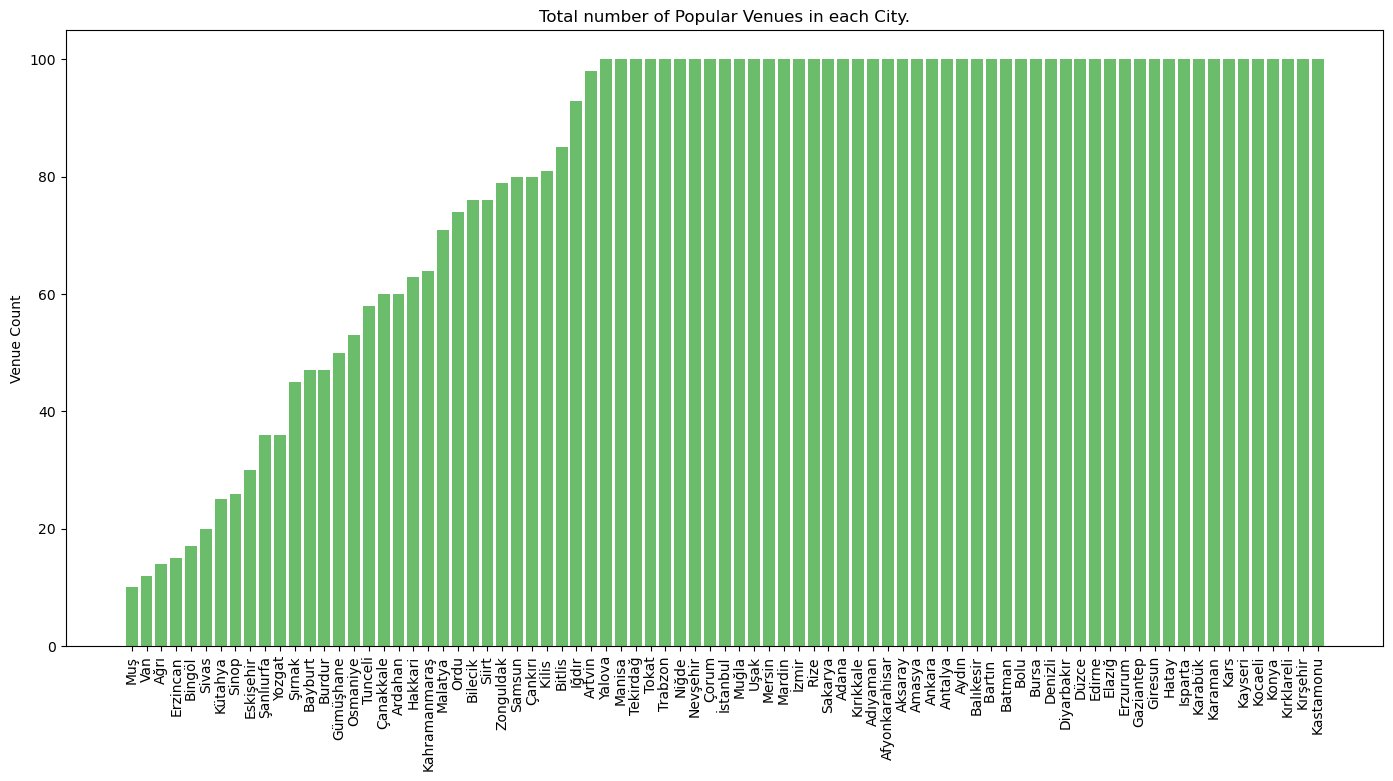

In [14]:
# Summary DataFrame Chart
objects = summary['City']
y_pos = np.arange(len(objects))
performance = summary['Count']
plt.figure(figsize=(17, 8))
plt.bar(y_pos, performance, align='center', alpha=0.7, color="tab:green")
plt.xticks(y_pos, objects)
plt.ylabel('Venue Count')
plt.title('Total number of Popular Venues in each City.')
plt.xticks(rotation=90)
plt.show()

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/9.png" target="_blank">here</a>.

When the data obtained with the Foursquare API was summarized, it was seen that a total of
__347 types of popular venues__ belonging to different categories were identified. A new data table
has been created showing __the 10 most common venues__ in each province.

In [15]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
city_onehot['City'] = city_venues['City'] 

# move city column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

#  347 popular venues in different categories were found.
city_grouped = city_onehot.groupby('City').mean().reset_index()

print(city_grouped.shape)
city_grouped.head(11)

(81, 348)


City  Afghan Restaurant  African Restaurant  Airport  \
0            Adana           0.000000                 0.0     0.00   
1         Adıyaman           0.000000                 0.0     0.01   
2   Afyonkarahisar           0.000000                 0.0     0.00   
3          Aksaray           0.000000                 0.0     0.00   
4           Amasya           0.000000                 0.0     0.00   
5           Ankara           0.000000                 0.0     0.00   
6          Antalya           0.000000                 0.0     0.00   
7          Ardahan           0.000000                 0.0     0.00   
8           Artvin           0.010204                 0.0     0.00   
9            Aydın           0.000000                 0.0     0.00   
10            Ağrı           0.000000                 0.0     0.00   

    Airport Food Court  Airport Lounge  Airport Service  American Restaurant  \
0                  0.0            0.00              0.0                  0.0   
1                  0.0            0.01              0.0                  0.0   
2                  0.0            0.00              0.0                  0.0   
3                  0.0            0.00              0.0                  0.0   
4                  0.0            0.00              0.0                  0.0   
5                  0.0            0.00              0.0                  0.0   
6                  0.0            0.00              0.0                  0.0   
7                  0.0            0.00              0.0                  0.0   
8                  0.0            0.00              0.0                  0.0   
9                  0.0            0.00              0.0                  0.0   
10                 0.0            0.00              0.0                  0.0   

    Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0            0.0    0.00         0.01        0.00                 0.00   
1            0.0    0.00         0.01        0.00                 0.01   
2            0.0    0.02         0.00        0.00                 0.01   
3            0.0    0.01         0.01        0.00                 0.00   
4            0.0    0.00         0.00        0.00                 0.00   
5            0.0    0.00         0.01        0.01                 0.00   
6            0.0    0.00         0.01        0.00                 0.01   
7            0.0    0.00         0.00        0.00                 0.00   
8            0.0    0.00         0.00        0.00                 0.00   
9            0.0    0.00         0.00        0.00                 0.00   
10           0.0    0.00         0.00        0.00                 0.00   

    Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0               0.000000          0.000000            0.010000   
1               0.000000          0.000000            0.010000   
2               0.000000          0.000000            0.000000   
3               0.000000          0.000000            0.000000   
4               0.000000          0.010000            0.000000   
5               0.000000          0.000000            0.010000   
6               0.000000          0.000000            0.000000   
7               0.016667          0.000000            0.033333   
8               0.000000          0.000000            0.000000   
9               0.000000          0.000000            0.000000   
10              0.000000          0.071429            0.000000   

    Austrian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                   0.0             0.00         0.00            0.0   
1                   0.0             0.00         0.00            0.0   
2                   0.0             0.00         0.00            0.0   
3                   0.0             0.01         0.01            0.0   
4                   0.0             0.00         0.01            0.0   
5                   0.0             0.00         0.00            0.0   
6                   0.0   

In [16]:
# Most Common Venues of Each City
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head(11)

City 1st Most Common Venue 2nd Most Common Venue  \
0            Adana                 Hotel           Coffee Shop   
1         Adıyaman                  Café                 Hotel   
2   Afyonkarahisar                  Café          Dessert Shop   
3          Aksaray                  Café                 Hotel   
4           Amasya                  Café                 Hotel   
5           Ankara                  Farm            Restaurant   
6          Antalya           Coffee Shop    Seafood Restaurant   
7          Ardahan                  Café                  Farm   
8           Artvin                  Café            Restaurant   
9            Aydın                  Café                   Bar   
10            Ağrı                  Park             Juice Bar   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             Steakhouse    Turkish Restaurant           Candy Store   
1           Dessert Shop           Coffee Shop    Turkish Restaurant   
2   Gym / Fitness Center                Bakery           Coffee Shop   
3   Gym / Fitness Center                  Park            Restaurant   
4     Turkish Restaurant           Coffee Shop            Restaurant   
5                   Café    Seafood Restaurant    Turkish Restaurant   
6                    Bar                  Park                 Hotel   
7      Electronics Store    Turkish Restaurant     Convenience Store   
8               Mountain                Forest                   Bar   
9            Coffee Shop  Gym / Fitness Center                Bakery   
10              Mountain                   Bay            Bagel Shop   

   6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0       Kebab Restaurant                  Café           Clothing Store   
1             Restaurant  Gym / Fitness Center                     Park   
2            Candy Store                Garden                     Park   
3           Dessert Shop    Turkish Restaurant                   Bakery   
4         History Museum                 Plaza  Comfort Food Restaurant   
5                 Bakery        Scenic Lookout     Gym / Fitness Center   
6   Gym / Fitness Center            Restaurant              Pizza Place   
7                   Park                 Diner              Coffee Shop   
8                   Park    Turkish Restaurant                    Hotel   
9           Dessert Shop                   Gym           Ice Cream Shop   
10    Seafood Restaurant            Toll Booth        Mobile Phone Shop   

   9th Most Common Venue 10th Most Common Venue  
0           Dessert Shop                    Gym  
1             Campground               Tea Room  
2          Shopping Mall       Kebab Restaurant  
3       Doner Restaurant         Clothing Store  
4             Pide Place                    Gym  
5            Coffee Shop   Other Great Outdoors  
6                   Café         Scenic Lookout  
7      Mobile Phone Shop     Athletics & Sports  
8             Campground             Steakhouse  
9     Turkish Restaurant            Kuruyemişçi  
10                Bistro       Asian Restaurant

### The dataset used for the K-Means algorithm

In [17]:
# Aggregating all useful features for clustering.
data = pd.concat([df.drop(['City'], 1), city_grouped.drop(['City'], 1)], axis=1)
print(data.shape)
data.head(10)

(81, 355)


Latitude  Longitude  Avg Magnitude  Avg Depth  Max Magnitude  Max Depth  \
0  36.993617  35.325835       4.389189  23.480270            6.2       86.0   
1  37.789360  38.314110       4.466667  16.218462            6.0       64.3   
2  38.685273  30.642741       4.490909  17.259091            6.0       44.9   
3  39.529160  43.383564       4.584783  21.560435            6.0       60.0   
4  40.656945  35.772717       4.269444  10.853056            5.6       33.0   
5  39.716044  32.705995       4.353704  10.589815            5.7       38.0   
6  36.900964  30.695485       4.392553  52.161809            5.4      159.2   
7  41.160506  41.839863       4.300000  15.910000            4.7       61.0   
8  37.841301  27.832837       4.478431  18.662353            6.8      101.0   
9  39.540080  28.022879       4.461333  15.355267            6.2       80.0   

   Min Magnitude  Min Depth  Afghan Restaurant  African Restaurant  Airport  \
0            4.0        2.0           0.000000                 0.0     0.00   
1            4.0        1.7           0.000000                 0.0     0.01   
2            4.0        2.0           0.000000                 0.0     0.00   
3            4.0        3.2           0.000000                 0.0     0.00   
4            4.0        3.1           0.000000                 0.0     0.00   
5            4.0        1.0           0.000000                 0.0     0.00   
6            4.0        1.6           0.000000                 0.0     0.00   
7            4.0        5.0           0.000000                 0.0     0.00   
8            4.0        2.8           0.010204                 0.0     0.00   
9            4.0        1.1           0.000000                 0.0     0.00   

   Airport Food Court  Airport Lounge  Airport Service  American Restaurant  \
0                 0.0            0.00              0.0                  0.0   
1                 0.0            0.01              0.0                  0.0   
2                 0.0            0.00              0.0                  0.0   
3                 0.0            0.00              0.0                  0.0   
4                 0.0            0.00              0.0                  0.0   
5                 0.0            0.00              0.0                  0.0   
6                 0.0            0.00              0.0                  0.0   
7                 0.0            0.00              0.0                  0.0   
8                 0.0            0.00              0.0                  0.0   
9                 0.0            0.00              0.0                  0.0   

   Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.0    0.00         0.01        0.00                 0.00   
1           0.0    0.00         0.01        0.00                 0.01   
2           0.0    0.02         0.00        0.00                 0.01   
3           0.0    0.01         0.01        0.00                 0.00   
4           0.0    0.00         0.00        0.00                 0.00   
5           0.0    0.00         0.01        0.01                 0.00   
6           0.0    0.00         0.01        0.00                 0.01   
7           0.0    0.00         0.00        0.00                 0.00   
8           0.0    0.00         0.00        0.00                 0.00   
9           0.0    0.00         0.00        0.00                 0.00   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0              0.000000              0.00            0.010000   
1              0.000000              0.00            0.010000   
2              0.000000              0.00            0.000000   
3              0.000000              0.00            0.000000   
4              0.000000              0.01            0.000000   
5              0.000000              0.00            0.010000   
6              0.000000              0.00            0.000000   
7              0.016667              0.00            0.033333   
8    

Before clustering, an overview of the data table.

In [18]:
# Data describe
data.describe()

Latitude  Longitude  Avg Magnitude  Avg Depth  Max Magnitude  \
count  81.000000  81.000000      81.000000  81.000000       81.00000   
mean   39.278224  35.151332       4.387088  19.213358        5.72716   
std     1.492617   5.051181       0.463951   9.193995        1.03320   
min    36.413747  26.558722       2.500000   0.000000        3.00000   
25%    37.871996  30.695485       4.381974  15.000000        5.10000   
50%    39.419172  34.868123       4.449167  17.702917        5.80000   
75%    40.656945  39.309437       4.533333  23.324815        6.50000   
max    41.707805  44.105478       5.200000  60.000000        7.90000   

        Max Depth  Min Magnitude  Min Depth  Afghan Restaurant  \
count   81.000000      81.000000  81.000000          81.000000   
mean    66.905432       3.900000   4.454815           0.000126   
std     42.460350       0.687023   7.569656           0.001134   
min      0.000000       1.000000   0.000000           0.000000   
25%     39.200000       4.000000   1.200000           0.000000   
50%     63.300000       4.000000   2.400000           0.000000   
75%     80.000000       4.000000   5.000000           0.000000   
max    212.000000       5.200000  60.000000           0.010204   

       African Restaurant    Airport  Airport Food Court  Airport Lounge  \
count           81.000000  81.000000           81.000000       81.000000   
mean             0.000452   0.001015            0.000123        0.000677   
std              0.002340   0.004483            0.001111        0.002685   
min              0.000000   0.000000            0.000000        0.000000   
25%              0.000000   0.000000            0.000000        0.000000   
50%              0.000000   0.000000            0.000000        0.000000   
75%              0.000000   0.000000            0.000000        0.000000   
max              0.014085   0.032258            0.010000        0.014085   

       Airport Service  American Restaurant  Antique Shop     Arcade  \
count        81.000000            81.000000     81.000000  81.000000   
mean          0.000329             0.000295      0.000513   0.005462   
std           0.002118             0.001876      0.002727   0.009600   
min           0.000000             0.000000      0.000000   0.000000   
25%           0.000000             0.000000      0.000000   0.000000   
50%           0.000000             0.000000      0.000000   0.000000   
75%           0.000000             0.000000      0.000000   0.010000   
max           0.015873             0.013158      0.018868   0.043011   

       Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
count    81.000000   81.000000            81.000000             81.000000   
mean      0.003992    0.000741             0.002380              0.001188   
std       0.010520    0.003073             0.010147              0.005921   
min       0.000000    0.000000             0.000000              0.000000   
25%       0.000000    0.000000             0.000000              0.000000   
50%       0.000000    0.000000             0.000000              0.000000   
75%       0.010000    0.000000             0.000000              0.000000   
max       0.083333    0.020000             0.083333              0.042553   

       Asian Restaurant  Athletics & Sports  Austrian Restaurant  \
count         81.000000           81.000000            81.000000   
mean           0.001005            0.001932             0.000726   
std            0.008000            0.005570             0.006536   
min            0.000000            0.000000             0.000000   
25%            0.000000            0.000000             0.000000   
50%            0.000000            0.000000             0.000000   
75%            0.000000            0.000000             0.000000   
max            0.071429            0.033333             0.058824   

       Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  \
count        81.000000    81.000000      81.000000  

## Clustering

There are different metric distance function for spatial distance.
__Sqeuclidean__ metric was chosen in the study. Because it made the elbow break point to be seen
more clearly. In order to determine the optimum number of clusters, clustering study was
conducted with different trials. The results were analyzed by increasing the cluster constant (k 
value) of the __K-Means algorithm__. When analyzed by The Elbow Method, it was decided that
the optimum value was __K = 3__. This situation can also be seen in the graphic below.

In [19]:
from sklearn.cluster import KMeans 

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0,
       0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

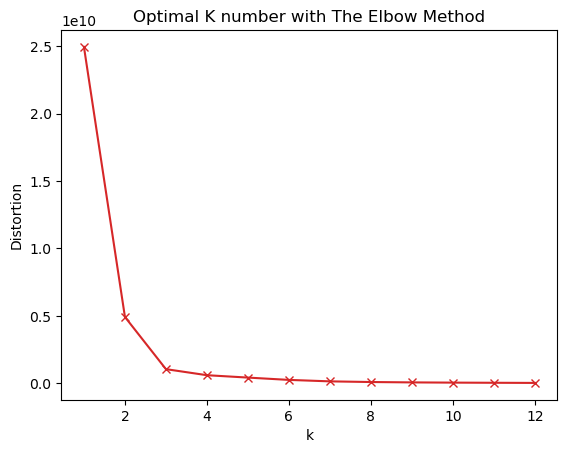

In [20]:
from scipy.spatial.distance import cdist

dist = []
K = range(1,13)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(data)
    dist.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'sqeuclidean'), axis=1)) **2)

plt.plot(K, dist, 'bx-', color='tab:red')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K number with The Elbow Method')
plt.show()

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/12.png" target="_blank">here</a>.

After the clustering study, a new data table was created giving the clusters found, city names,
avg. magnitude of earthquakes occurring in cities, and the 10 most common venues in each city.

In [21]:
df['Cluster Numbers'] = kmeans.labels_
df_last = pd.concat([df['Cluster Numbers'], df['City'], df['Avg Magnitude'], city_venues_sorted.drop('City',1)], axis=1)
df_last.head(7)

Cluster Numbers            City  Avg Magnitude 1st Most Common Venue  \
0                0           Adana       4.389189                 Hotel   
1                0        Adıyaman       4.466667                  Café   
2                1  Afyonkarahisar       4.490909                  Café   
3                0            Ağrı       4.584783                  Café   
4                1          Amasya       4.269444                  Café   
5                1          Ankara       4.353704                  Farm   
6                2         Antalya       4.392553           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop            Steakhouse    Turkish Restaurant   
1                 Hotel          Dessert Shop           Coffee Shop   
2          Dessert Shop  Gym / Fitness Center                Bakery   
3                 Hotel  Gym / Fitness Center                  Park   
4                 Hotel    Turkish Restaurant           Coffee Shop   
5            Restaurant                  Café    Seafood Restaurant   
6    Seafood Restaurant                   Bar                  Park   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Candy Store      Kebab Restaurant                  Café   
1    Turkish Restaurant            Restaurant  Gym / Fitness Center   
2           Coffee Shop           Candy Store                Garden   
3            Restaurant          Dessert Shop    Turkish Restaurant   
4            Restaurant        History Museum                 Plaza   
5    Turkish Restaurant                Bakery        Scenic Lookout   
6                 Hotel  Gym / Fitness Center            Restaurant   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Clothing Store          Dessert Shop                    Gym  
1                     Park            Campground               Tea Room  
2                     Park         Shopping Mall       Kebab Restaurant  
3                   Bakery      Doner Restaurant         Clothing Store  
4  Comfort Food Restaurant            Pide Place                    Gym  
5     Gym / Fitness Center           Coffee Shop   Other Great Outdoors  
6              Pizza Place                  Café         Scenic Lookout

When the __3 clusters detected__ were examined in terms of earthquake risk, they were labeled as
__LOW – MEDIUM – HIGH__. When the average earthquake magnitude of all cities in each
cluster was calculated, the risk ratio by clusters was also determined.

In [22]:
# Average earthquake magnitudes of cities in clusters.
df_color = df_last.groupby(['Cluster Numbers']).mean().sort_values(by='Avg Magnitude').apply(lambda x: round(x,3))

df_color.loc[df_color.index[0], 'Color'] = "green"
df_color.loc[df_color.index[1], 'Color'] = "orange"
df_color.loc[df_color.index[2], 'Color'] = "red"

df_color.loc[df_color.index[0], 'Labels'] = "LOW"
df_color.loc[df_color.index[1], 'Labels'] = "MEDIUM"
df_color.loc[df_color.index[2], 'Labels'] = "HIGH"
df_color

Avg Magnitude   Color  Labels
Cluster Numbers                               
1                        4.236   green     LOW
2                        4.484  orange  MEDIUM
0                        4.493     red    HIGH

In [23]:
# How many cities are in which cluster?
df_size = df_last.groupby(['Cluster Numbers']).size()
df_size

Cluster Numbers
0    38
1    33
2    10
dtype: int64

A new data table was created consisting of the
total number of cities owned by the clusters, the representation colors of the clusters on shapes
and maps, and cluster labels

In [24]:
# df_color has Cluster Numbers & Color & Labels & City Count
df_color.loc[df_color.index[0], 'City Count'] = df_size[df_color.index[0]]
df_color.loc[df_color.index[1], 'City Count'] = df_size[df_color.index[1]]
df_color.loc[df_color.index[2], 'City Count'] = df_size[df_color.index[2]]
df_color

Avg Magnitude   Color  Labels  City Count
Cluster Numbers                                           
1                        4.236   green     LOW        33.0
2                        4.484  orange  MEDIUM        10.0
0                        4.493     red    HIGH        38.0

### Pie Chart for Clusters

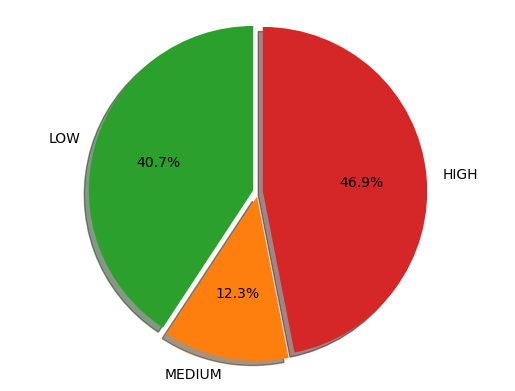

In [25]:
labels = df_color['Labels']
sizes = df_color['City Count']
explode = (0.03, 0.03, 0.03) 
colors_list = df_color['Color'].apply(lambda c: 'tab:{}'.format(c))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors_list, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/15.png" target="_blank">here</a>.

### Functions
Useful functions created.

In [26]:
# For Top 20 list
from itertools import islice
def cluster_top_chart(cluster, n=5, t='...', c='b'):
    words = {}
    for i in range(0,cluster.shape[0]):
        for k in range(0,10):
            temp = cluster.iloc[i,3:][k]
            if temp in words:
                words[temp] += 1
            else:
                words[temp] = 1
           
    top = {k: v for k, v in sorted(words.items(), reverse=True, key=lambda item: item[1])}
    items = list(top.items())

    objects = []
    performance = []
    for i in range(0,n):
        objects.append(items[i][0])
        performance.append(items[i][1])

    fig, ax = plt.subplots()
    y_pos = np.arange(len(objects))
    ax.barh(y_pos, performance, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(objects)
    ax.invert_yaxis()
    ax.set_xlabel('Total Venues')
    ax.set_title('Top {} list of All Most Common Venues in Cluster {}'.format(n,t))

    for cl in range(n):
        ax.get_children()[cl].set_color('tab:{}'.format(c))
        
    plt.show()
    
# Cluster Numbers to Cluster Labels
def cluster_labeling(n=0):
    return df_color.loc[n, 'Labels']

# Cluster Numbers to Cluster Colors
def cluster_coloring(n=0):
    return df_color.loc[n, 'Color']

# Comparison of the first most common venues of the cities in the cluster.
def cluster_first_common_venue(n=0):
    temp = df_last[df_last['Cluster Numbers']==n].groupby(['1st Most Common Venue']).size().sort_values(
         ascending=False).reset_index().rename(columns={0:'Total'}).head(5)
    Groups = np.full((1, temp.shape[0]), cluster_labeling(n))[0]
    MultiIndex = pd.MultiIndex.from_tuples(list(zip(Groups,np.arange(temp.shape[0]))))
    MultiDF = pd.DataFrame(np.array(temp),MultiIndex,['1st Most Common Venue','Total'])
    return MultiDF

In [27]:
# All clusters together
cluster_list = {}

We do not name the cluster in this title. Because the algorithm can generate different ids each time.

## Cluster: 0 

In [28]:
clstr = 0
cluster_list[clstr] = df_last[df_last['Cluster Numbers'] == clstr]
cluster_list[clstr]

Cluster Numbers           City  Avg Magnitude 1st Most Common Venue  \
0                 0          Adana       4.389189                 Hotel   
1                 0       Adıyaman       4.466667                  Café   
3                 0           Ağrı       4.584783                  Café   
7                 0         Artvin       4.300000                  Café   
8                 0          Aydın       4.478431                  Café   
9                 0      Balıkesir       4.461333                  Café   
10                0        Bilecik       4.350000                  Park   
12                0         Bitlis       4.326667                  Café   
14                0         Burdur       4.519118                  Café   
15                0          Bursa       4.386076                  Café   
16                0      Çanakkale       4.450400            Steakhouse   
17                0        Çankırı       4.537879                  Café   
18                0          Çorum       4.622222                 Hotel   
21                0         Edirne       4.657895                 Hotel   
22                0         Elazığ       4.423171                  Café   
23                0       Erzincan       4.630682                  Café   
25                0      Eskişehir       5.200000                  Café   
30                0          Hatay       4.521739                  Café   
31                0        Isparta       4.407500                  Café   
34                0          İzmir       4.381974                  Café   
35                0           Kars       4.475862                  Café   
36                0      Kastamonu       4.703846            Campground   
37                0        Kayseri       4.405556                  Café   
40                0        Kocaeli       4.529268                  Café   
43                0        Malatya       4.432911           Coffee Shop   
44                0         Manisa       4.416901                  Café   
45                0  Kahramanmaraş       4.272881         Historic Site   
53                0        Sakarya       4.449167                  Café   
55                0          Siirt       4.328571                 Hotel   
57                0          Sivas       4.432432                  Café   
61                0        Tunceli       4.428947    Turkish Restaurant   
63                0           Uşak       4.497143              Mountain   
64                0            Van       4.381714                  Farm   
65                0         Yozgat       4.820000    Turkish Restaurant   
71                0         Batman       4.733333                  Café   
75                0          Iğdır       4.515385                  Café   
79                0       Osmaniye       4.407895                  Farm   
80                0          Düzce       4.411842                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Coffee Shop            Steakhouse    Turkish Restaurant   
1                  Hotel          Dessert Shop           Coffee Shop   
3                  Hotel  Gym / Fitness Center                  Park   
7                   Farm     Electronics Store    Turkish Restaurant   
8             Restaurant              Mountain                Forest   
9                    Bar           Coffee Shop  Gym / Fitness Center   
10             Juice Bar              Mountain                   Bay   
12                 Hotel    Seafood Restaurant            Restaurant   
14              Tea Room                  Park            Pide Place   
15            Restaurant    Turkish Restaurant            Steakhouse   
16              Mountain            Hot Spring       Nature Preserve   
17                 Hotel    Turkish Restaurant           Coffee Shop   
18                  Café            Restaurant              Mountain   
21          Dessert Shop    Turkish Restaurant  Gym / Fitness Center  

In [29]:
# City List of Cluster 0.
', '.join(cluster_list[clstr]['City'])

'Adana, Adıyaman, Ağrı, Artvin, Aydın, Balıkesir, Bilecik, Bitlis, Burdur, Bursa, Çanakkale, Çankırı, Çorum, Edirne, Elazığ, Erzincan, Eskişehir, Hatay, Isparta, İzmir, Kars, Kastamonu, Kayseri, Kocaeli, Malatya, Manisa, Kahramanmaraş, Sakarya, Siirt, Sivas, Tunceli, Uşak, Van, Yozgat, Batman, Iğdır, Osmaniye, Düzce'

Now we know which label the cluster has.

In [30]:
# 1st Most Common Venue Counts in Cluster 0.
cluster_first_common_venue(clstr)

1st Most Common Venue Total
HIGH 0                  Café    24
     1                 Hotel     4
     2    Turkish Restaurant     2
     3                  Farm     2
     4            Steakhouse     1

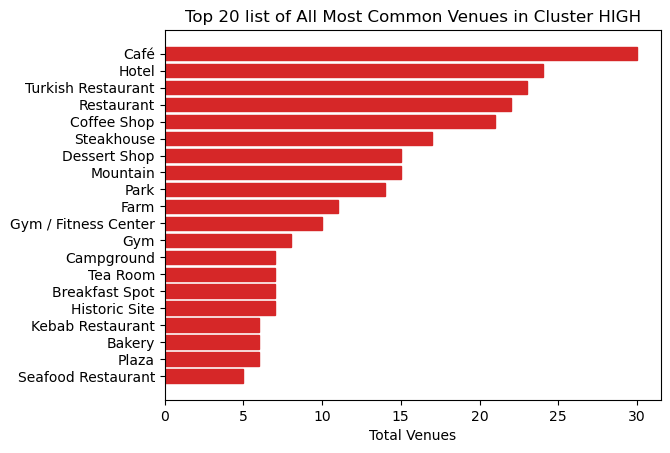

In [31]:
# Top 20 list of 1 to 10 most common venues in Cluster 0.
cluster_top_chart(cluster_list[clstr], n=20, t=cluster_labeling(clstr), c=cluster_coloring(clstr))

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/18.png" target="_blank">here</a>.

In [32]:
# Average earthquake magnitude in Cluster 0.
eq_coef = cluster_list[clstr]['Avg Magnitude'].mean()
print('Average earthquake magnitude in Cluster {}: {}'.format(cluster_labeling(clstr),round(eq_coef,2)))

Average earthquake magnitude in Cluster HIGH: 4.49


## Cluster: 1 

In [33]:
clstr = 1
cluster_list[clstr] = df_last[df_last['Cluster Numbers'] == clstr]
cluster_list[clstr]

Cluster Numbers            City  Avg Magnitude 1st Most Common Venue  \
2                 1  Afyonkarahisar       4.490909                  Café   
4                 1          Amasya       4.269444                  Café   
5                 1          Ankara       4.353704                  Farm   
13                1            Bolu       4.415625                  Café   
26                1       Gaziantep       4.527778                  Park   
27                1         Giresun       4.683333                  Café   
28                1       Gümüşhane       4.309091                  Farm   
29                1         Hakkari       4.324390          Dessert Shop   
33                1        İstanbul       4.596000                  Café   
38                1      Kırklareli       2.500000                  Café   
39                1        Kırşehir       4.942857                  Café   
46                1          Mardin       4.533333                  Café   
49                1        Nevşehir       4.500000                  Farm   
50                1           Niğde       4.133333                  Café   
51                1            Ordu       4.620000                  Café   
52                1            Rize       2.500000           Coffee Shop   
54                1          Samsun       4.330000                  Lake   
56                1           Sinop       4.600000                  Café   
58                1        Tekirdağ       4.382500                  Park   
59                1           Tokat       4.540000                  Café   
60                1         Trabzon       4.500000                  Café   
62                1       Şanlıurfa       4.354545                  Café   
66                1       Zonguldak       4.600000                  Café   
67                1         Aksaray       4.180000                  Café   
68                1         Bayburt       4.400000                  Café   
69                1         Karaman       4.400000                  Café   
70                1       Kırıkkale       4.593333         Historic Site   
72                1          Şırnak       4.310000            Restaurant   
73                1         Bartın        2.500000                  Café   
74                1         Ardahan       4.506667                  Café   
76                1          Yalova       4.300000                  Café   
77                1         Karabük       5.077778                Mosque   
78                1          Kilis        2.500000                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2           Dessert Shop  Gym / Fitness Center                Bakery   
4                  Hotel    Turkish Restaurant           Coffee Shop   
5             Restaurant                  Café    Seafood Restaurant   
13           Coffee Shop            Steakhouse    Turkish Restaurant   
26     Convenience Store         Moving Target    Turkish Restaurant   
27         Historic Site    Turkish Restaurant                 Hotel   
28     Recreation Center            Campground    Light Rail Station   
29                 Hotel                  Café      Kebab Restaurant   
33              Mountain            Steakhouse  Gym / Fitness Center   
38          Dessert Shop            Restaurant    Turkish Restaurant   
39    Turkish Restaurant                 Hotel            Restaurant   
46              Mountain            Steakhouse                  Park   
49              Mountain                 Plaza    Turkish Restaurant   
50           Coffee Shop          Dessert Shop                  Park   
51                 Hotel         Historic Site            Restaurant   
52    Turkish Restaurant                  Café                   Bar   
54              Mountain                  Farm            Steakhouse   
56            Steakhouse          Dessert Shop                 Hotel   
58                  Café            Campground     

In [34]:
# City List of Cluster 1.
', '.join(cluster_list[clstr]['City'])

'Afyonkarahisar, Amasya, Ankara, Bolu, Gaziantep, Giresun, Gümüşhane, Hakkari, İstanbul, Kırklareli, Kırşehir, Mardin, Nevşehir, Niğde, Ordu, Rize, Samsun, Sinop, Tekirdağ, Tokat, Trabzon, Şanlıurfa, Zonguldak, Aksaray, Bayburt, Karaman, Kırıkkale, Şırnak, Bartın , Ardahan, Yalova, Karabük, Kilis '

In [35]:
# 1st Most Common Venue Counts in Cluster 1.
cluster_first_common_venue(clstr)

1st Most Common Venue Total
LOW 0                  Café    22
    1                  Farm     3
    2                  Park     2
    3            Restaurant     1
    4                Mosque     1

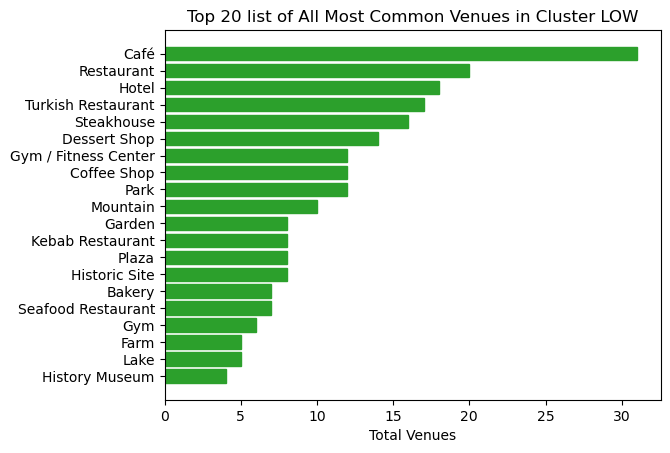

In [36]:
# Top Venues in Cluster 1.
cluster_top_chart(cluster_list[clstr], n=20, t=cluster_labeling(clstr), c=cluster_coloring(clstr))

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/24.png" target="_blank">here</a>.

In [37]:
# Average earthquake magnitude in Cluster 1.
eq_coef = cluster_list[clstr]['Avg Magnitude'].mean()
print('Average earthquake magnitude in Cluster {}: {}'.format(cluster_labeling(clstr),round(eq_coef,2)))

Average earthquake magnitude in Cluster LOW: 4.24


## Cluster: 2

In [38]:
clstr = 2
cluster_list[clstr] = df_last[df_last['Cluster Numbers'] == clstr]
cluster_list[clstr]

Cluster Numbers        City  Avg Magnitude 1st Most Common Venue  \
6                 2     Antalya       4.392553           Coffee Shop   
11                2      Bingöl       4.440000                  Café   
19                2     Denizli       4.483226              Mountain   
20                2  Diyarbakır       4.525490                  Café   
24                2     Erzurum       4.531481                  Café   
32                2      Mersin       4.582353                  Café   
41                2       Konya       4.485185                  Café   
42                2     Kütahya       4.428923                  Café   
47                2       Muğla       4.430923                  Café   
48                2         Muş       4.540000                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6     Seafood Restaurant                   Bar                  Park   
11           Coffee Shop      Kebab Restaurant     Convenience Store   
19            Steakhouse     Convenience Store            Restaurant   
20         Historic Site                 Hotel                Mosque   
24            Restaurant    Turkish Restaurant           Coffee Shop   
32      Kebab Restaurant                 Hotel            Steakhouse   
41           Coffee Shop              Vineyard            Steakhouse   
42          Dessert Shop                  Farm            Restaurant   
47           Coffee Shop            Restaurant  Gym / Fitness Center   
48                  Park            Steakhouse    Turkish Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6                  Hotel  Gym / Fitness Center            Restaurant   
11  Gym / Fitness Center          Dessert Shop    Kokoreç Restaurant   
19                   Bay                 Beach                  Farm   
20    Turkish Restaurant            Restaurant        History Museum   
24  Gym / Fitness Center        History Museum                Mosque   
32     Mobile Phone Shop           Coffee Shop            Bagel Shop   
41          Burger Joint        Scenic Lookout          Dessert Shop   
42    Turkish Restaurant      Kebab Restaurant              Mountain   
47    Turkish Restaurant                  Park                   Gym   
48           Coffee Shop              Tea Room                Arcade   

   8th Most Common Venue    9th Most Common Venue 10th Most Common Venue  
6            Pizza Place                     Café         Scenic Lookout  
11                 Hotel              Kofte Place             Restaurant  
19            Campground                     Lake                   Café  
20      Kebab Restaurant             Dance Studio     Seafood Restaurant  
24                 Hotel                      Gym          Historic Site  
32            Restaurant                 Mountain                    Bar  
41                Bakery     Gym / Fitness Center   Other Great Outdoors  
42         Big Box Store  Comfort Food Restaurant           Concert Hall  
47          Burger Joint             Dessert Shop   Fast Food Restaurant  
48          Dessert Shop                    Plaza                  Hotel

In [39]:
# City List of Cluster 2.
', '.join(cluster_list[clstr]['City'])

'Antalya, Bingöl, Denizli, Diyarbakır, Erzurum, Mersin, Konya, Kütahya, Muğla, Muş'

In [40]:
# 1st Most Common Venue Counts in Cluster 2.
cluster_first_common_venue(clstr)

1st Most Common Venue Total
MEDIUM 0                  Café     8
       1              Mountain     1
       2           Coffee Shop     1

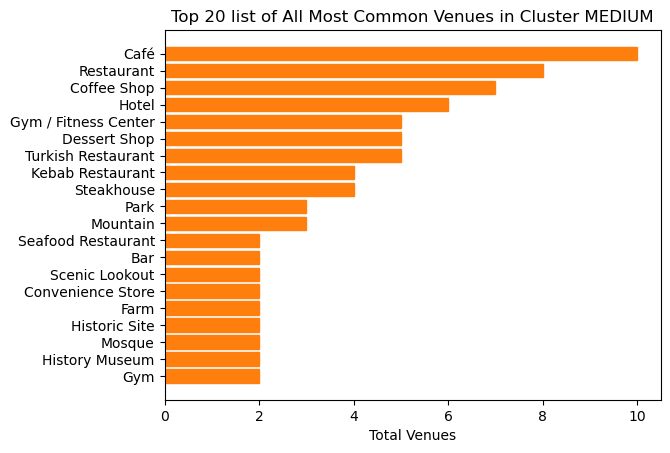

In [41]:
# Top Venues in Cluster 2.
cluster_top_chart(cluster_list[clstr], n=20, t=cluster_labeling(clstr), c=cluster_coloring(clstr))

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/21.png" target="_blank">here</a>.

In [42]:
# Average earthquake magnitude in Cluster 2.
eq_coef = cluster_list[clstr]['Avg Magnitude'].mean()
print('Average earthquake magnitude in Cluster {}: {}'.format(cluster_labeling(clstr),round(eq_coef,2)))

Average earthquake magnitude in Cluster MEDIUM: 4.48


### Pre-Mapping Process

In [43]:
# Adding Latitude and Longitude for mapping.
df_last['Latitude'] = df['Latitude']
df_last['Longitude'] = df['Longitude'] 
df_last

Cluster Numbers            City  Avg Magnitude 1st Most Common Venue  \
0                 0           Adana       4.389189                 Hotel   
1                 0        Adıyaman       4.466667                  Café   
2                 1  Afyonkarahisar       4.490909                  Café   
3                 0            Ağrı       4.584783                  Café   
4                 1          Amasya       4.269444                  Café   
5                 1          Ankara       4.353704                  Farm   
6                 2         Antalya       4.392553           Coffee Shop   
7                 0          Artvin       4.300000                  Café   
8                 0           Aydın       4.478431                  Café   
9                 0       Balıkesir       4.461333                  Café   
10                0         Bilecik       4.350000                  Park   
11                2          Bingöl       4.440000                  Café   
12                0          Bitlis       4.326667                  Café   
13                1            Bolu       4.415625                  Café   
14                0          Burdur       4.519118                  Café   
15                0           Bursa       4.386076                  Café   
16                0       Çanakkale       4.450400            Steakhouse   
17                0         Çankırı       4.537879                  Café   
18                0           Çorum       4.622222                 Hotel   
19                2         Denizli       4.483226              Mountain   
20                2      Diyarbakır       4.525490                  Café   
21                0          Edirne       4.657895                 Hotel   
22                0          Elazığ       4.423171                  Café   
23                0        Erzincan       4.630682                  Café   
24                2         Erzurum       4.531481                  Café   
25                0       Eskişehir       5.200000                  Café   
26                1       Gaziantep       4.527778                  Park   
27                1         Giresun       4.683333                  Café   
28                1       Gümüşhane       4.309091                  Farm   
29                1         Hakkari       4.324390          Dessert Shop   
30                0           Hatay       4.521739                  Café   
31                0         Isparta       4.407500                  Café   
32                2          Mersin       4.582353                  Café   
33                1        İstanbul       4.596000                  Café   
34                0           İzmir       4.381974                  Café   
35                0            Kars       4.475862                  Café   
36                0       Kastamonu       4.703846            Campground   
37                0         Kayseri       4.405556                  Café   
38                1      Kırklareli       2.500000                  Café   
39                1        Kırşehir       4.942857                  Café   
40                0         Kocaeli       4.529268                  Café   
41                2           Konya       4.485185                  Café   
42                2         Kütahya       4.428923                  Café   
43                0         Malatya       4.432911           Coffee Shop   
44                0          Manisa       4.416901                  Café   
45                0   Kahramanmaraş       4.272881         Historic Site   
46                1          Mardin       4.533333                  Café   
47                2           Muğla       4.430923                  Café   
48                2             Muş       4.540000                  Café   
49                1        Nevşehir       4.500000                  Farm   
50                1           Niğde       4.133333                  Café   
51                1            Ordu       4.620000  

### Turkey Map with Cluster dots.
The dots shown in Red on the map above belong to Cluster HIGH, which has the highest
earthquake risk. Orange dots represent MEDIUM and Green dots represent Cluster LOW.

In [44]:
cluster_map = folium.Map(location=[tr_lat, tr_lon], zoom_start=6)
for lat, lon, lbl, c, mag in zip(df_last['Latitude'], df_last['Longitude'], df_last['Cluster Numbers'], 
                                 df_last['City'], df_last['Avg Magnitude']):

    html="<b>Cluster:</b> " + str(cluster_labeling(lbl)) + " | <b>City:</b> " + str(c)
    label = folium.Popup(html, parse_html=False)
    fill_color = cluster_coloring(lbl)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=fill_color,
        fill_opacity=1).add_to(cluster_map)

cluster_map

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/25.png" target="_blank">here</a>.

### Choropleth Map
Choropleth Map with color distribution according to the average
earthquake magnitude was also created.

In [45]:
# The visualization of Cluster Points and Average Earthquake Magnitude distribution in the map of Turkey
turkey_geo = f'https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/data/cities_of_turkey.json'
turkey_map = folium.Map(location=[tr_lat, tr_lon], zoom_start=6)

turkey_map.choropleth(
    geo_data=turkey_geo,
    data=df_last,
    columns=['City','Avg Magnitude'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.9,
    legend_name='Average Earthquake Magnitude Scale',
    highlight=True
)

for lat, lon, lbl, c, mag in zip(df_last['Latitude'], 
                                 df_last['Longitude'], df_last['Cluster Numbers'], 
                                 df_last['City'], df_last['Avg Magnitude']):
    label = folium.Popup(str(c)+' /  Cluster: '+str(cluster_labeling(lbl))+' / Avg. Magnitude: '
                         +str(round(mag,2)),parse_html=True)
    fill_color = cluster_coloring(lbl)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color=fill_color,
        fill_opacity=1).add_to(turkey_map)
    
turkey_map

If chart doesn't show up on GitHub, you can see it in <a href="https://raw.githubusercontent.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/main/images/26.png" target="_blank">here</a>.

## Discussion
The first aim of this study is to help business people and ordinary citizens in their investment
decisions and social lives for the future by analyzing popular venues in cities with earthquake
data.

Although the statistical data used in the project represented a part of the city, it was seen as
representing the whole. For example, an earthquake that occurred in only one part of the city
was considered to have occurred in the whole. Therefore, the city-based study can be carried
out on a district or neighborhood basis by digging deeper.

In addition, more data can be obtained with different data sources other than Foursquare API
data. Thus, it will be possible to obtain sharper and different results.
Another aim of the project is to make inferences by examining old earthquakes and to produce
information that we can benefit from.

For example, if there have been too many earthquakes in a city and the magnitude of the
earthquake is high, it is likely that an earthquake will occur in that city again due to fault
activity. However, this acceptance does not lead to the conclusion that places where there have
been no earthquakes for many years are safe. The approaches used in this study can be handled
with different data and different methods in the future, and different results can be reached.

## Conclusion
As a result, this project has helped to better understand the characteristics of cities in terms of
earthquakes and social venues. The project has supported not only the investors but also the
city managers or planners in their decisions. It also played a guiding role for all kinds of
researchers using data analysis types in areas similar to the one in this study.

All data sets, Python codes and image files used in the study are stored in the relevant GitHub
account. Thus, it is made ready to be used for different projects in the future.

Stay with the Science.


__Zeki ÇIPLAK__<br>
Physicist, Data & Computer Science Enthusiast.

<span style="font-size:8pt">* You can access the PDF file with detailed explanations about the project from <a href="https://github.com/zkcplk/Earthquake_and_Popular_Venues_Data_Analysis_of_Turkey/blob/main/Article.pdf">this link</a>.</span>

<center>&copy; 2020</center>